# Assignment-04-Simple Linear Regression-2

In [41]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']= 100

In [42]:
# import dataset
df=pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## EDA and Data Visualization

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


<Axes: ylabel='YearsExperience'>

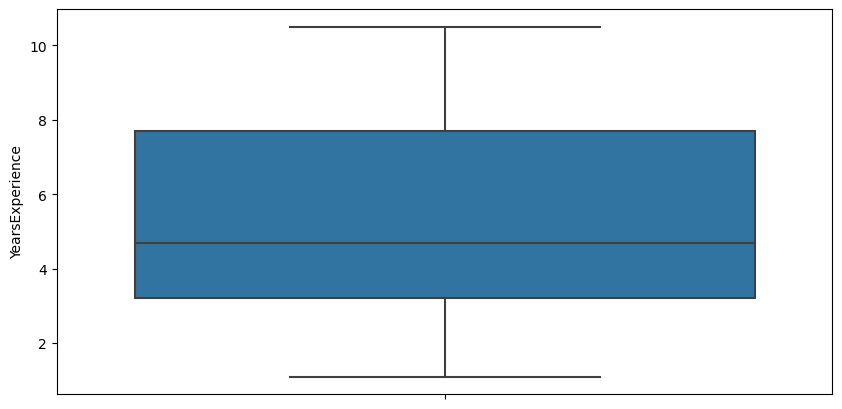

In [44]:
sns.boxplot(y=df['YearsExperience'])

<Axes: ylabel='Salary'>

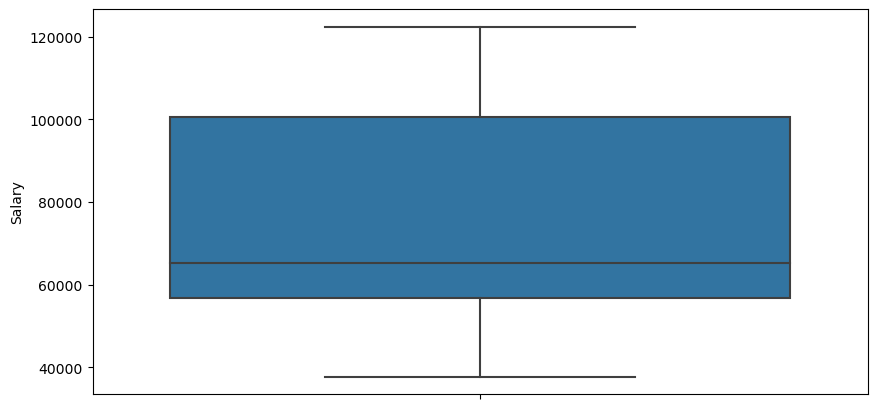

In [45]:
sns.boxplot(y=df['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Density'>

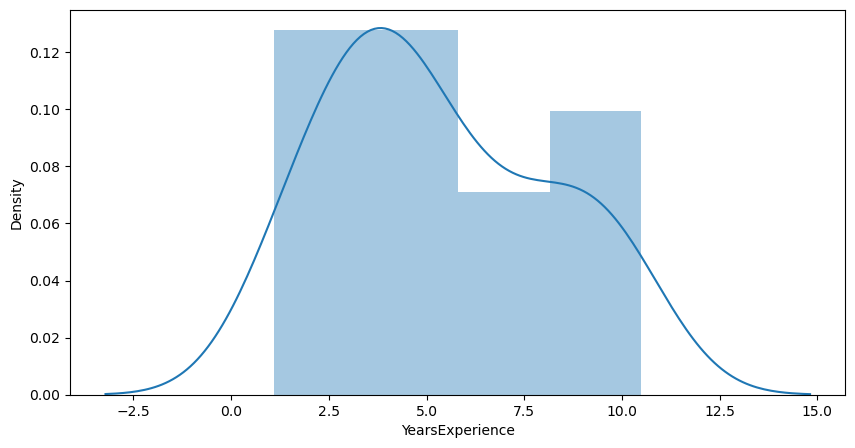

In [46]:
sns.distplot(df['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

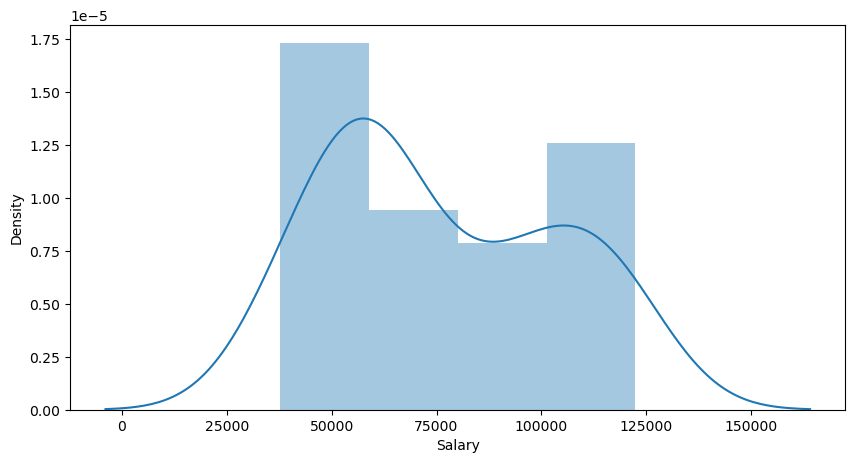

In [47]:
sns.distplot(df['Salary'])

## Correlation Analysis

In [48]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

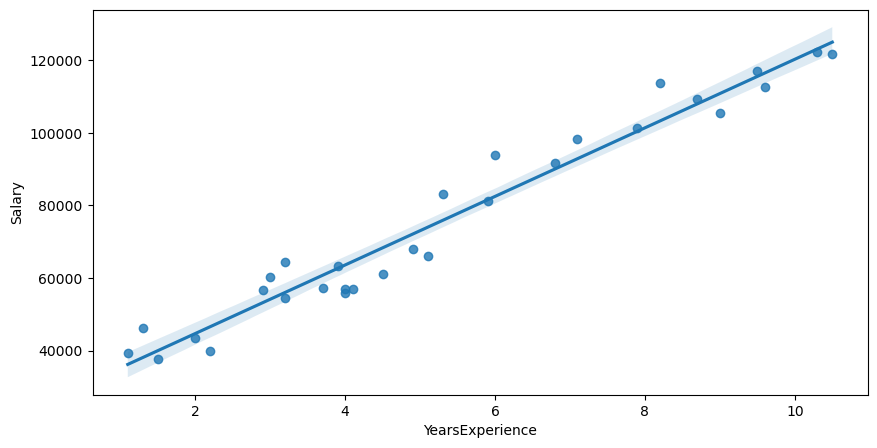

In [49]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])

## Model Building

In [50]:
model=smf.ols("Salary~YearsExperience",data=df).fit()

## Model Testing

In [51]:
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [52]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [53]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

## Model Predictions

In [54]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [55]:
# Automatic Prediction for say 3 & 5 Years Experience 

In [56]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [57]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [58]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

# Data Transformation
    1.log
    2.sqrt

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [60]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


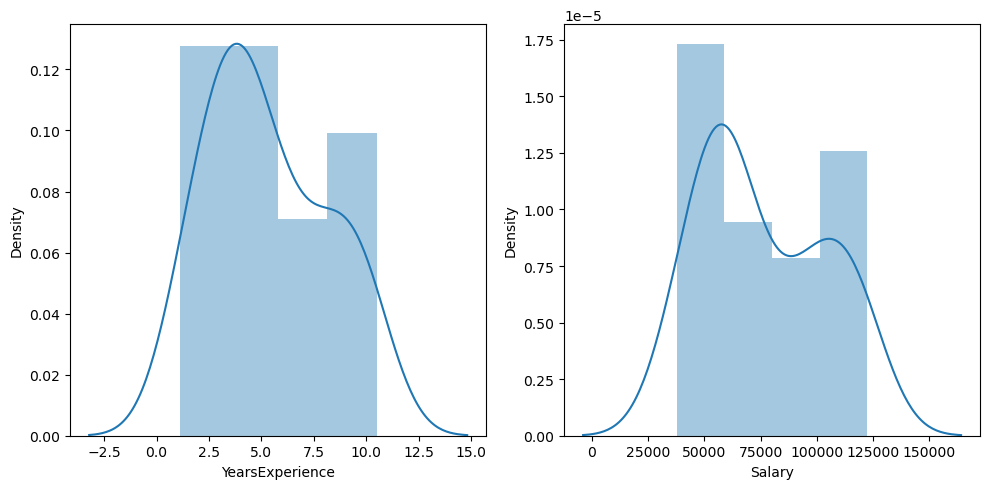

In [61]:
plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(df['Salary'])

plt.tight_layout()

In [62]:
print('Skewness of Years_Experience : ',df['YearsExperience'].skew())
print('Skewness of Salary : ',df['Salary'].skew())

Skewness of Years_Experience :  0.37956024064804106
Skewness of Salary :  0.35411967922959153


## Log Transformation

In [63]:
df['log_YearsExperience']=np.log(df['YearsExperience'])
df['log_Salary']=np.log(df['Salary'])

In [64]:
df

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906
5,2.9,56642.0,1.064711,10.944506
6,3.0,60150.0,1.098612,11.004597
7,3.2,54445.0,1.163151,10.904946
8,3.2,64445.0,1.163151,11.073567
9,3.7,57189.0,1.308333,10.954117


In [65]:
x=df[['log_YearsExperience']]
y=df[['log_Salary']]

In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [67]:
lr=LinearRegression()

In [68]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [69]:
ypred=lr.predict(xtest)

In [70]:
print(mean_squared_error(ytest,ypred))

0.008164868642796497


In [71]:
print(np.sqrt(mean_squared_error(ytest,ypred)))

0.09035966269744757


## Sqrt Transformation

In [72]:
df['sqrt_YearsExperience']=np.sqrt(df['YearsExperience'])
df['sqrt_Salary']=np.sqrt(df['Salary'])

In [73]:
df

,YearsExperience,Salary,log_YearsExperience,log_Salary,sqrt_YearsExperience,sqrt_Salary
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314
5,2.9,56642.0,1.064711,10.944506,1.702939,237.995798
6,3.0,60150.0,1.098612,11.004597,1.732051,245.254969
7,3.2,54445.0,1.163151,10.904946,1.788854,233.334524
8,3.2,64445.0,1.163151,11.073567,1.788854,253.860198
9,3.7,57189.0,1.308333,10.954117,1.923538,239.142217


In [74]:
x=df[['sqrt_YearsExperience']]
y=df[['sqrt_Salary']]

In [75]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [76]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [77]:
ypred=lr.predict(xtest)

In [78]:
print('MSE Value : ',mean_squared_error(ytest,ypred))

MSE Value :  142.00152324612762


In [79]:
print('RMSE Value : ',np.sqrt(mean_squared_error(ytest,ypred)))

RMSE Value :  11.916439201629302
